<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Michelle Wong\AppData\Local\Temp\ipykernel_1960\1204336695.py:6: SyntaxWarning: invalid escape sequence '\S'
  "Server=DESKTOP-19LPOE8\SQLEXPRESS;"
C:\Users\Michelle Wong\AppData\Local\Temp\ipykernel_1960\1204336695.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


   BusinessEntityID  AnnualRevenue  YearOpened
0               292        80000.0        1996
1               294        80000.0        1991
2               296        80000.0        1999
3               298        80000.0        1994
4               300        80000.0        1987


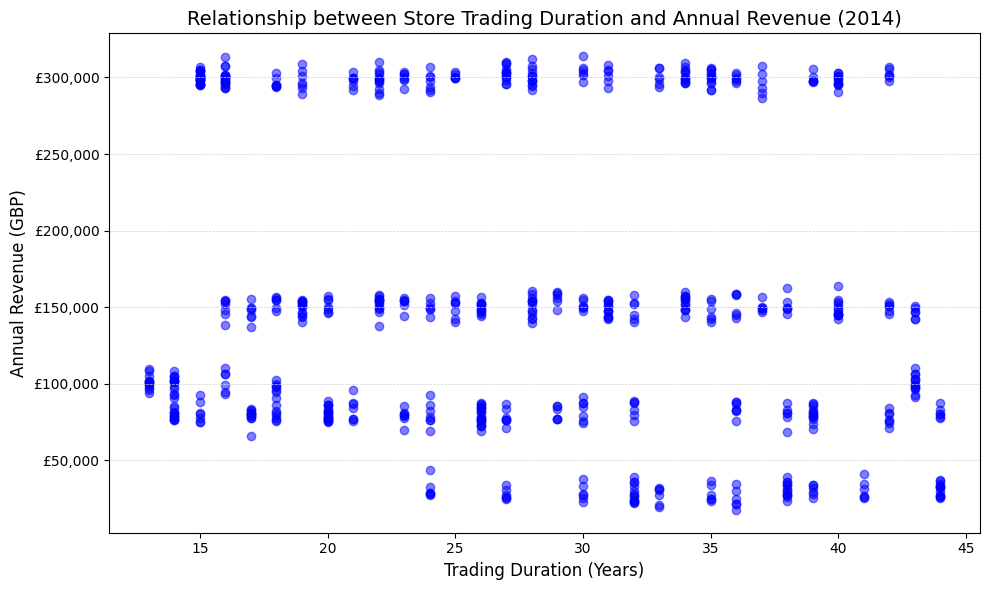

Pearson correlation between Trading Duration and Annual Revenue: -0.13


In [23]:
import pyodbc
import pandas as pd

# Set up the connection string
connection_string = ("driver={odbc Driver 17 for SQL Server};"
                     "Server=DESKTOP-19LPOE8\SQLEXPRESS;"
                     "Database=AdventureWorks2022;"
                     "Trusted_Connection=yes")
connection = pyodbc.connect(connection_string)


# SQL query to fetch data from the view
query = """
SELECT BusinessEntityID, AnnualRevenue, YearOpened
FROM Sales.vStoreWithDemographics
"""

# Load data into pandas DataFrame
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Display the first few rows of the data
print(df.head())

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Calculate the trading duration (in years) relative to 2014
reference_year = 2014  # Use the year 2014 for analysis
df['TradingDuration'] = reference_year - df['YearOpened']

# Ensure no missing data in the relevant columns
df = df.dropna(subset=['YearOpened', 'AnnualRevenue'])

# Add random jitter to the 'AnnualRevenue' to avoid exact overlap
jitter = np.random.normal(0, 5000, size=df.shape[0])  # Small jitter

# Plot the relationship between trading duration and annual revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['TradingDuration'], df['AnnualRevenue'] + jitter, color='blue', alpha=0.5)

# Set titles and labels
plt.title('Relationship between Store Trading Duration and Annual Revenue (2014)', fontsize=14)
plt.xlabel('Trading Duration (Years)', fontsize=12)
plt.ylabel('Annual Revenue (GBP)', fontsize=12)

# Format y-axis to display the pound sign (£)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '£{:,}'.format(int(x))))

# Add grid lines for better readability
plt.grid(True, axis='y', linestyle='--', color='lightgray', linewidth=0.5)

# Adjust the layout to ensure the plot looks neat
plt.tight_layout()

# Show the plot
plt.show()

# Calculate the correlation coefficient between Trading Duration and Annual Revenue
correlation = df['TradingDuration'].corr(df['AnnualRevenue'])

print(f"Pearson correlation between Trading Duration and Annual Revenue: {correlation:.2f}")